## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1.) Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2.) Let's write periodic boundary condition allowing the wave propagating from the right to the left or left to the right and run the code for longer tend. (hint: after each timestep, set quantities at the leftmost grid the same as quantities at the second to the rightmost grids U[0]=U[-2]; set quantities at the rightmost grid the same as quantities at the second to the leftmost grids.)

3.) Please experiment with different grid sizes.

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


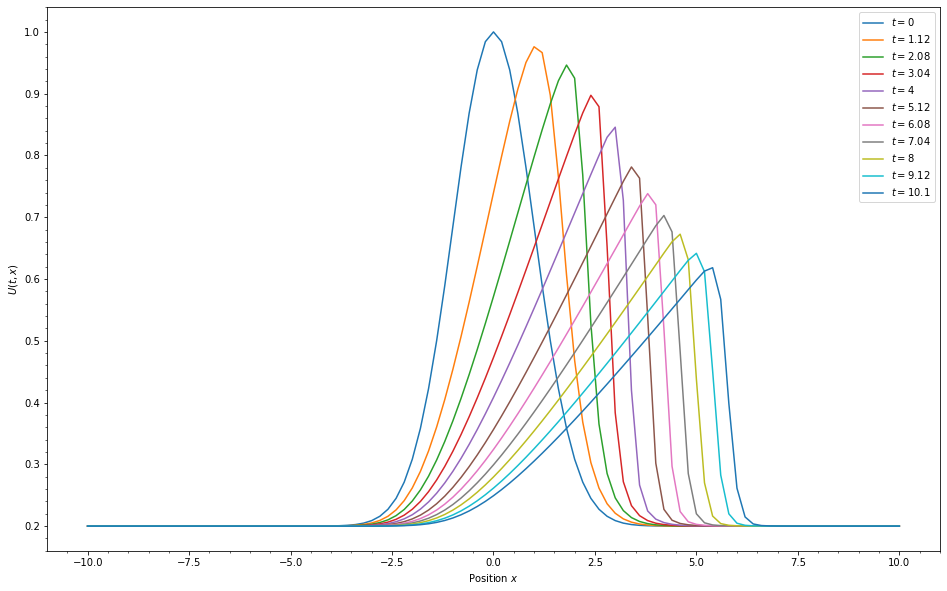

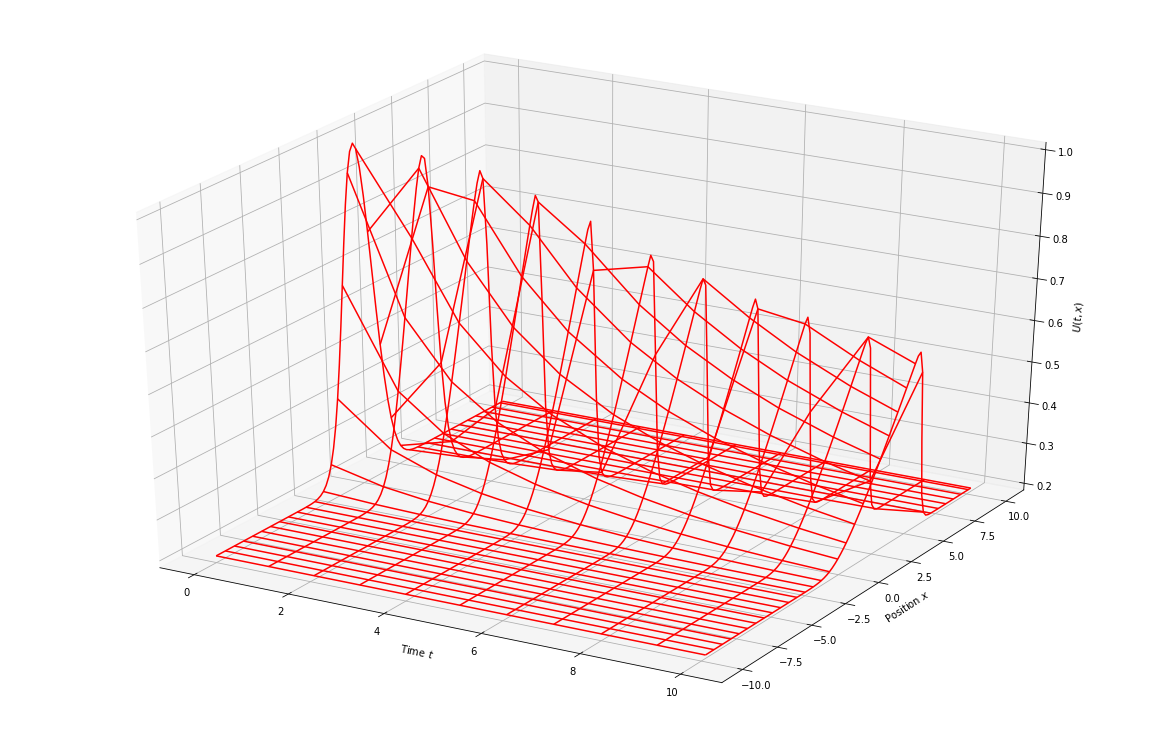

In [14]:
"""
Implementing the upwind method with U as a gaussian profile. (Without periodic boundary condition)
"""

# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
            # Task: implement upwind method here.
        else:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            # Task: implement upwind method here.
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U)
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

From the above plot, the function U begins at U(0,0) with a gaussian profile. After each time step, the profile becomes increasingly asymmetric. Below, I use the same program but with a negative velocity (negative function U) to ensure that the downwind portion of the program is also working.

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


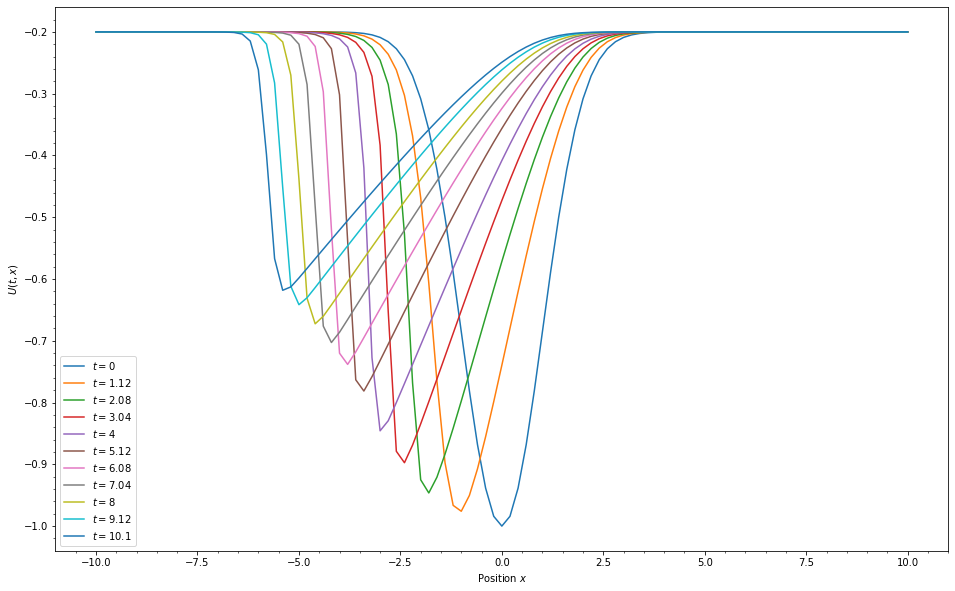

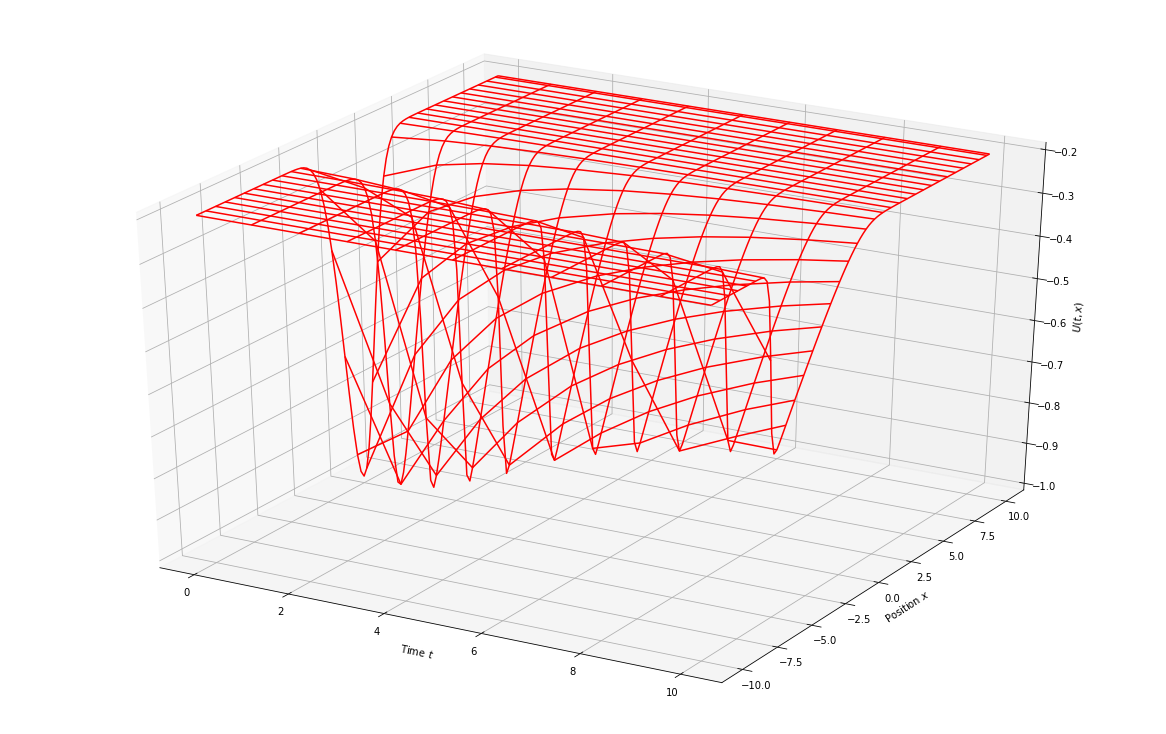

In [16]:
#Implementing boundary conditions: set leftmost grid and rightmost grid
   # U[0] = U[-2]
    #U[100] = U[-99]
    
"""
Implementing the upwind method with U as a gaussian profile. (Without periodic boundary condition)
"""

# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = -0.2 - 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
  
    #Implement U velocity where U is some function (gaussian)
    for ix in range(1, Nx - 1):
        if U[ix] > 0:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
            # Task: implement upwind method here.
        else:
            U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
            # Task: implement upwind method here.
            
    t += dt
    
    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        #plt.plot(x, U)
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Okay, so with a negative U velocity, the wave travels from right to left, so the downwind method is working as well as the upwind method. Below, I implement the code with periodic boundary condition: I also wrap the program in a function so that I don't have to keep copy-pasting the whole program to try out different grid sizes.

In [51]:
#Implementing boundary conditions: set leftmost grid and rightmost grid
   # U[0] = U[-2]
    #U[100] = U[-99]
    
"""
Implementing the upwind method with U as a gaussian profile. (Wit periodic boundary condition)
"""

# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
#xmin = -10.0   # left boundary
#xmax = +10.0   # right boundary
#Nx = 101      # number of grid points (including boundary)
#tend = 10.    # end time
#dtout = 1.0   # time interval for outputs


def Burger(xmin, xmax, Nx, tend, dtout):
    
    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.8 * dx
    U = np.zeros(Nx,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    # Begin the simulation.
    tout = t + dtout
    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)

        # Find the state at the next time step.

        #Implement U velocity where U is some function (gaussian)
        for ix in range(1, Nx - 1):
            if U[ix] > 0:
                U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
                # Task: implement upwind method here.
            else:
                U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
                # Task: implement upwind method here.

        t += dt

        U[0] = U[-2]
        U[Nx-1] = U[-(Nx-2)]
        # Save the data after every dtout.
        if t >= tout:
            #plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            plt.plot(x, U)
            tp.append(t)
            Up = np.vstack((Up, U))
            #print("t = ", t)
            tout += dtout

    ax.legend()

    # Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,10))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done.")
    plt.show()

Done.


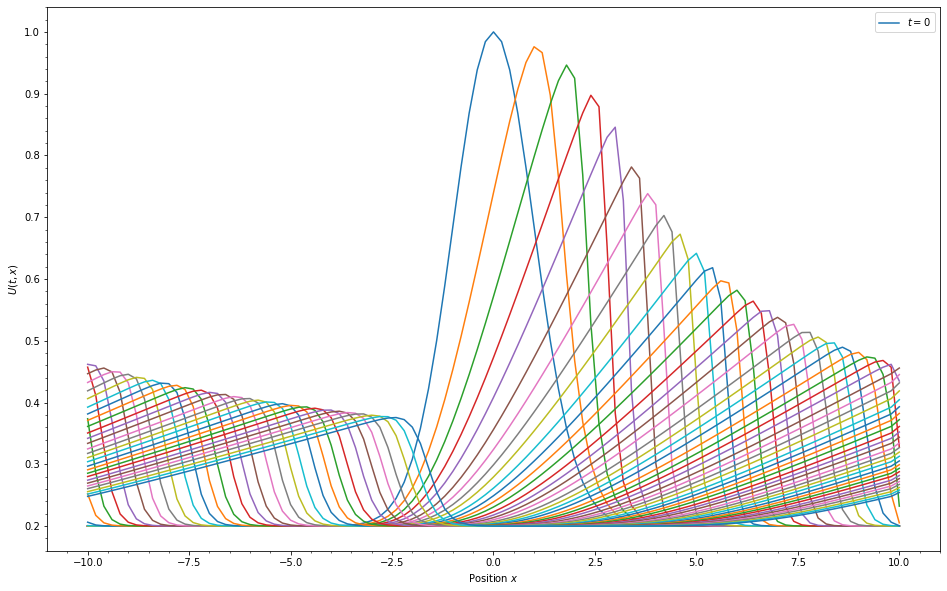

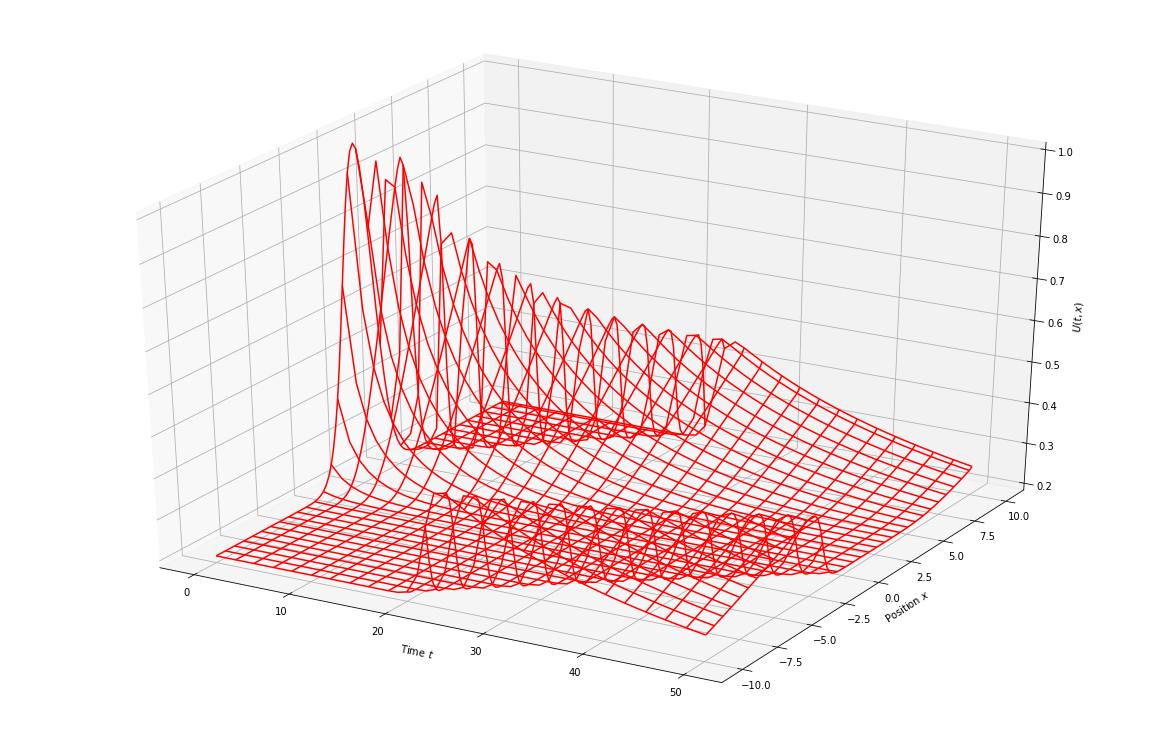

In [52]:
"""
Periodic boundary condition test 1: same grid size as before.
"""

# Model Parameters
x_min = -10.0   # left boundary
x_max = +10.0   # right boundary
N_x = 101      # number of grid points (including boundary)
t_end = 50.    # end time
dt_out = 1.0   # time interval for outputs

Burger(x_min, x_max, N_x, t_end, dt_out)

Done.


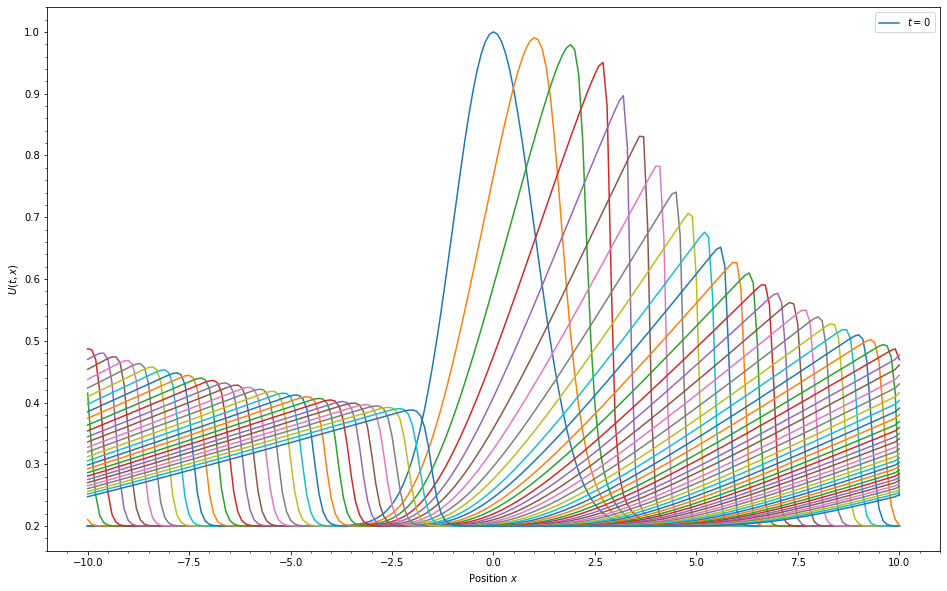

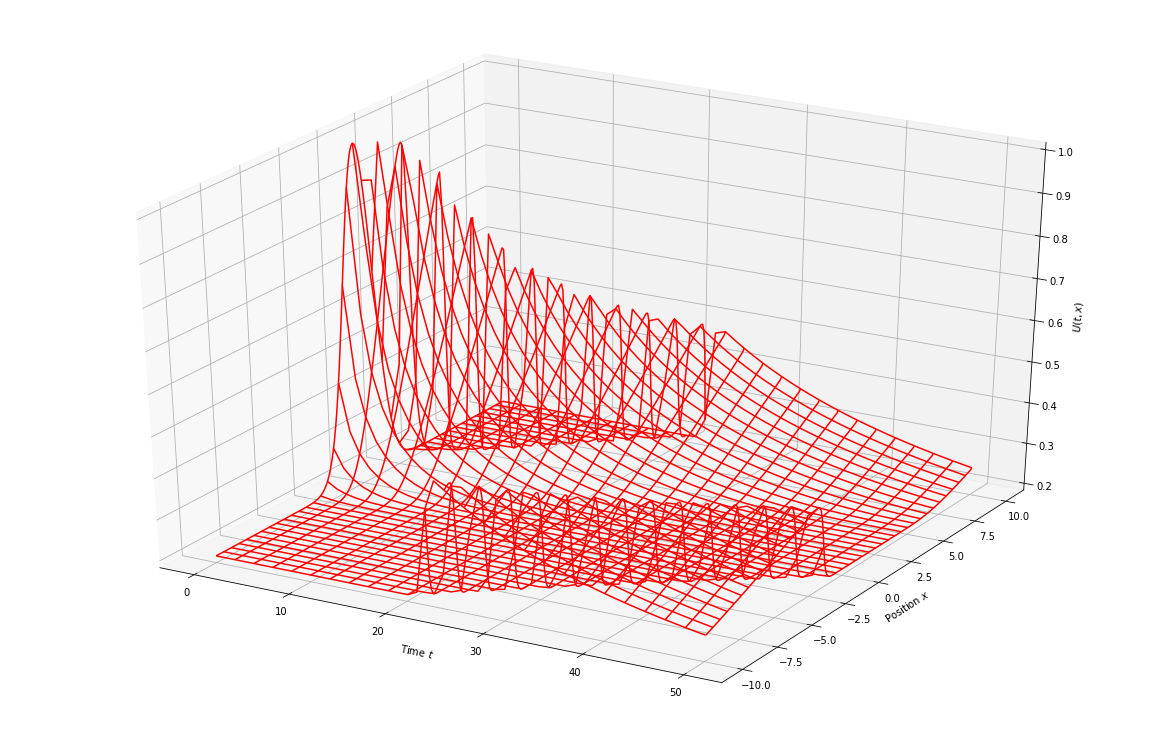

In [35]:
"""
Periodic boundary condition test 2: doubling the grid size
"""

# Model Parameters
x_min = -10.0   # left boundary
x_max = +10.0   # right boundary
N_x = 201      # number of grid points (including boundary)
t_end = 50.    # end time
dt_out = 1.0   # time interval for outputs

Burger(x_min, x_max, N_x, t_end, dt_out)

Done.


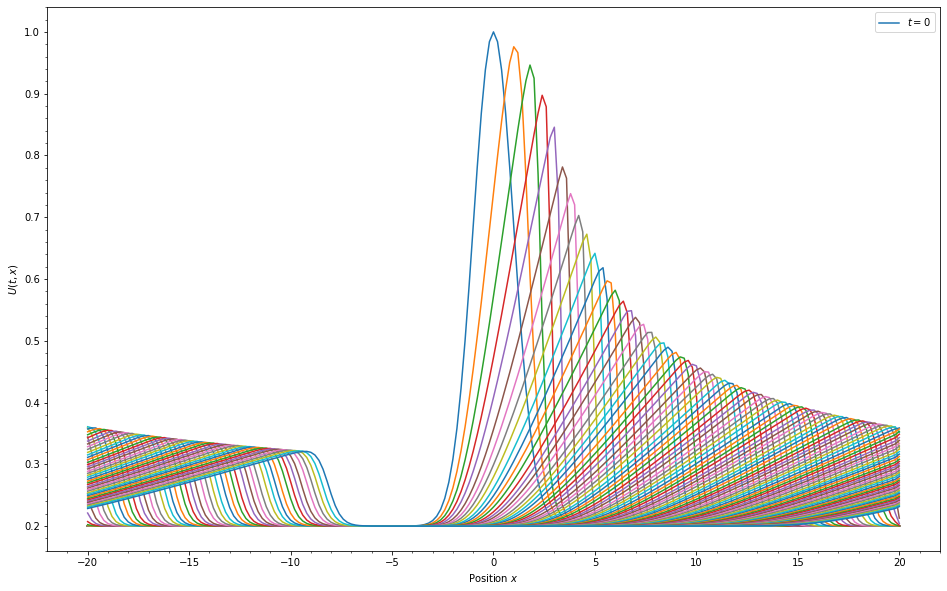

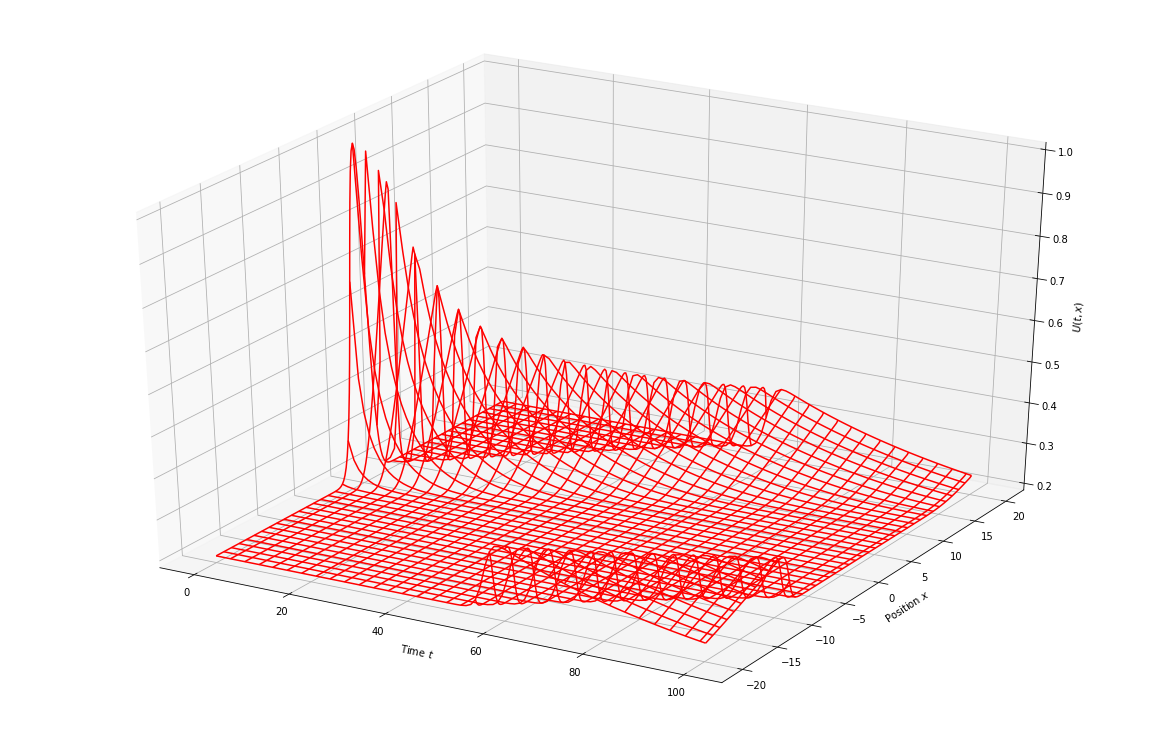

In [38]:
"""
Periodic boundary condition test 3: doubling the grid size and the boundaries, increasing t_end.
"""

# Model Parameters
x_min = -20.0   # left boundary
x_max = +20.0   # right boundary
N_x = 201      # number of grid points (including boundary)
t_end = 100.    # end time
dt_out = 1.0   # time interval for outputs

Burger(x_min, x_max, N_x, t_end, dt_out)

Done.


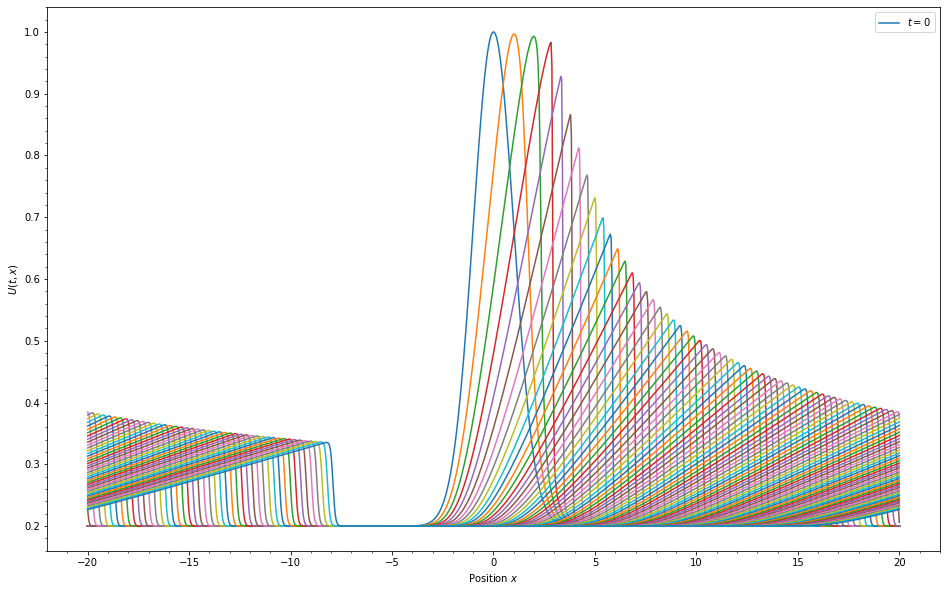

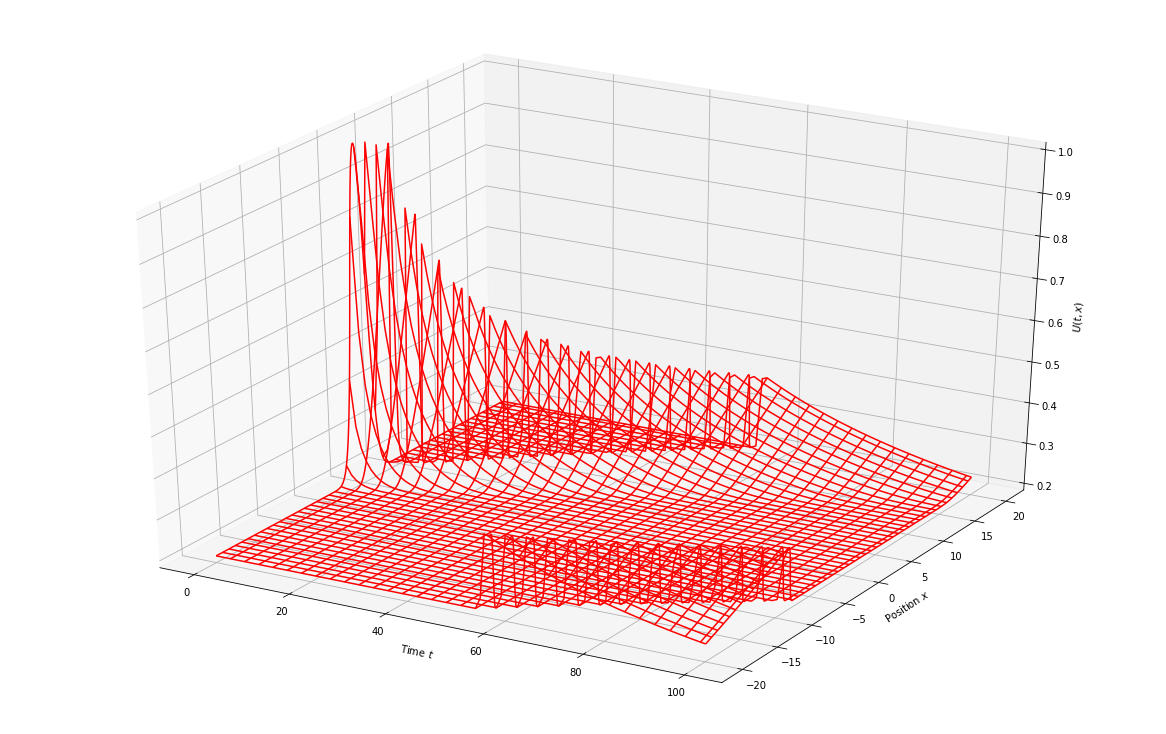

In [39]:
"""
Periodic boundary condition test 3: changing the grid size and the boundaries, increasing t_end.
"""

# Model Parameters
x_min = -20.0   # left boundary
x_max = +20.0   # right boundary
N_x = 1001      # number of grid points (including boundary)
t_end = 100.    # end time
dt_out = 1.0   # time interval for outputs

Burger(x_min, x_max, N_x, t_end, dt_out)

Done.


C:\Users\durke\OneDrive\Documents\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


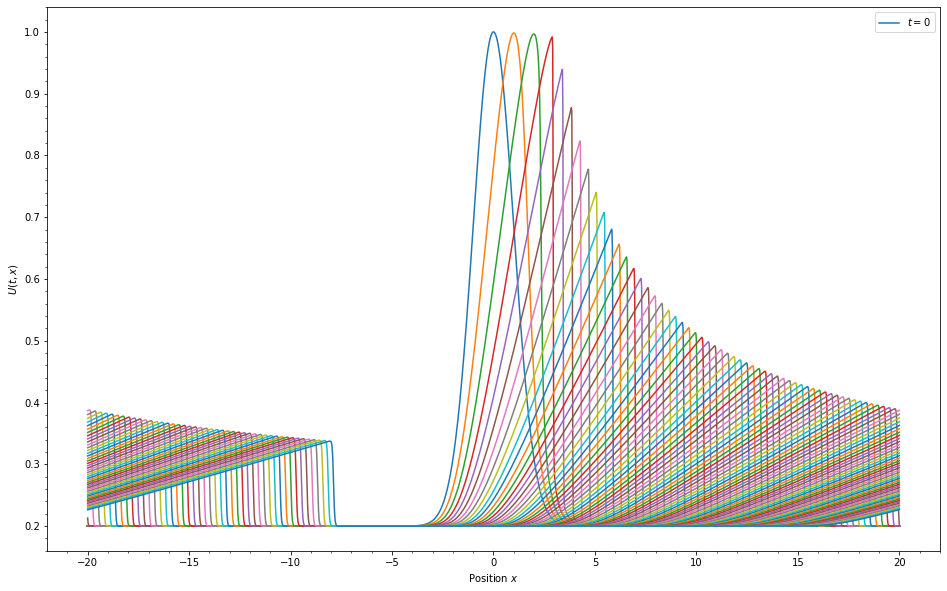

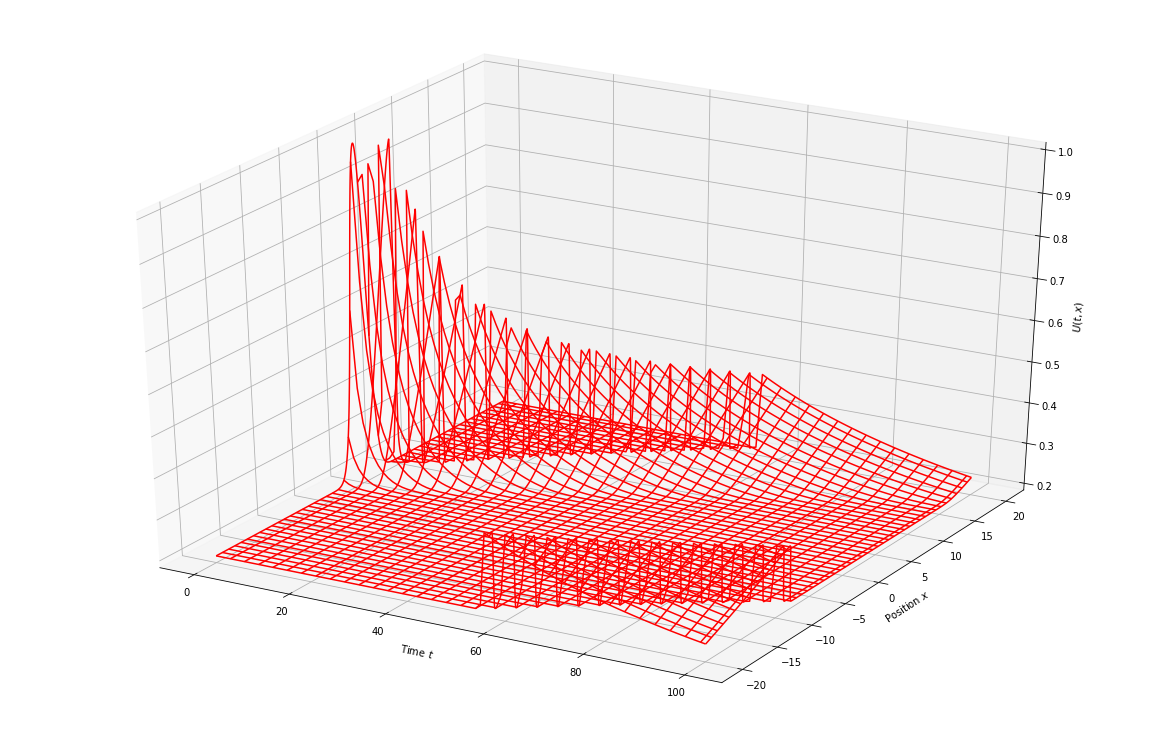

In [48]:
"""
Periodic boundary condition test 3: changing the grid size and the boundaries, increasing t_end.
"""

# Model Parameters
x_min = -20.0   # left boundary
x_max = +20.0   # right boundary
N_x = 2001      # number of grid points (including boundary)
t_end = 100.    # end time
dt_out = 1.0   # time interval for outputs

Burger(x_min, x_max, N_x, t_end, dt_out)

Increasing the grid size increases the resolution of our velocity surface as can be seen by the above graphs.

So why does the function profile become more assymetric as time/position increase? To understand this, look at the code that updates the function value after each time and space step:

if U[ix] > 0:

    U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix]-Uold[ix-1])/dx
                
else:
    
    U[ix] = Uold[ix] - (Uold[ix]*dt)*(Uold[ix+1]-Uold[ix])/dx
                

U is initially defined as a Gaussian, so at U(x,t) = U(0,0), the function is gaussian.
However, the function value at each successive step is updated by the upwind/downwind method according to the equations above. With each update, the new function value is decreased in intensity due to the subtraction of the second term. However, the addition of each new term with each successive step also makes the new function value, U[ix], less and less Gaussian. Rather, it becomes some combination of the previous Gaussian values.

